<a href="https://colab.research.google.com/github/AnaYukimoto/Projetos-Python/blob/main/tensorFlowKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
# Carregar o conjunto de dados MNIST
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

# Normalizar os dados para o intervalo [0, 1]
X_train, X_test = X_train / 255.0, X_test / 255.0

# Redimensionar os dados para incluir o canal de cor (necessário para CNN)
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compilar o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 41ms/step - accuracy: 0.8844 - loss: 0.3613 - val_accuracy: 0.9808 - val_loss: 0.0597
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 30ms/step - accuracy: 0.9837 - loss: 0.0532 - val_accuracy: 0.9889 - val_loss: 0.0358
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 31ms/step - accuracy: 0.9896 - loss: 0.0349 - val_accuracy: 0.9905 - val_loss: 0.0327
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9927 - loss: 0.0240 - val_accuracy: 0.9889 - val_loss: 0.0374
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.9936 - loss: 0.0200 - val_accuracy: 0.9898 - val_loss: 0.0379


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nAcurácia no conjunto de teste: {test_acc:.2f}')

313/313 - 4s - 11ms/step - accuracy: 0.9898 - loss: 0.0379

Acurácia no conjunto de teste: 0.99


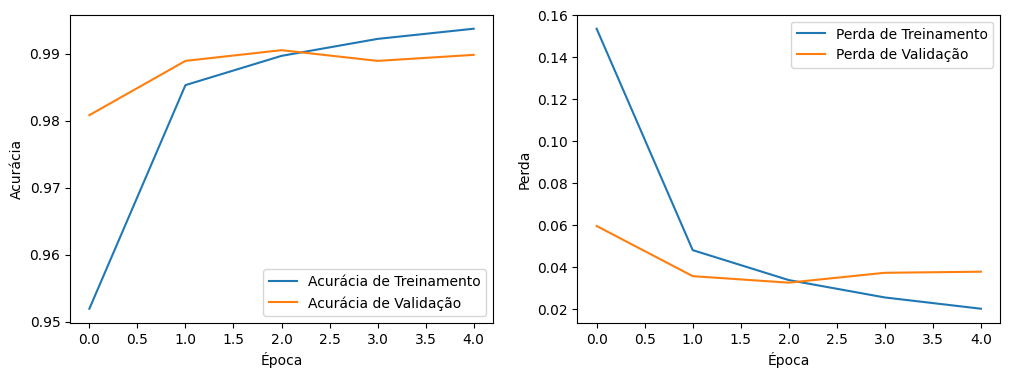

In [ ]:
# Plotar a acurácia e a perda durante o treinamento
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda de Treinamento')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


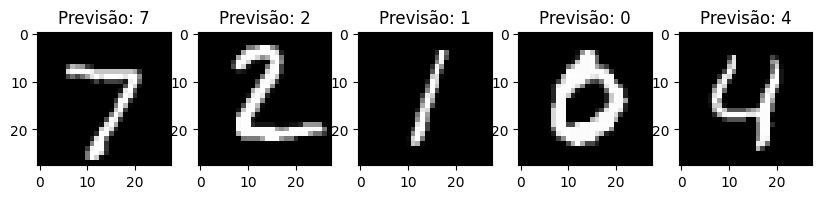

In [ ]:
# Prever para imagens individuais
predictions = model.predict(X_test[:5])

plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Previsão: {predictions[i].argmax()}')
plt.show()